## Advertisement Spending Visualizations

/tmp/ipykernel_25538/1699793371.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Democrat', 'Republican'], fontsize=15, fontweight='bold')
/tmp/ipykernel_25538/1699793371.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Democrat', 'Republican'], fontsize=15, fontweight='bold')
/tmp/ipykernel_25538/1699793371.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Democrat', 'Republican'], fontsize=15, fontweight='bold')
/tmp/ipykernel_25538/1699793371.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Democrat', 'Republican'], fontsize=15, fontweight='bold')


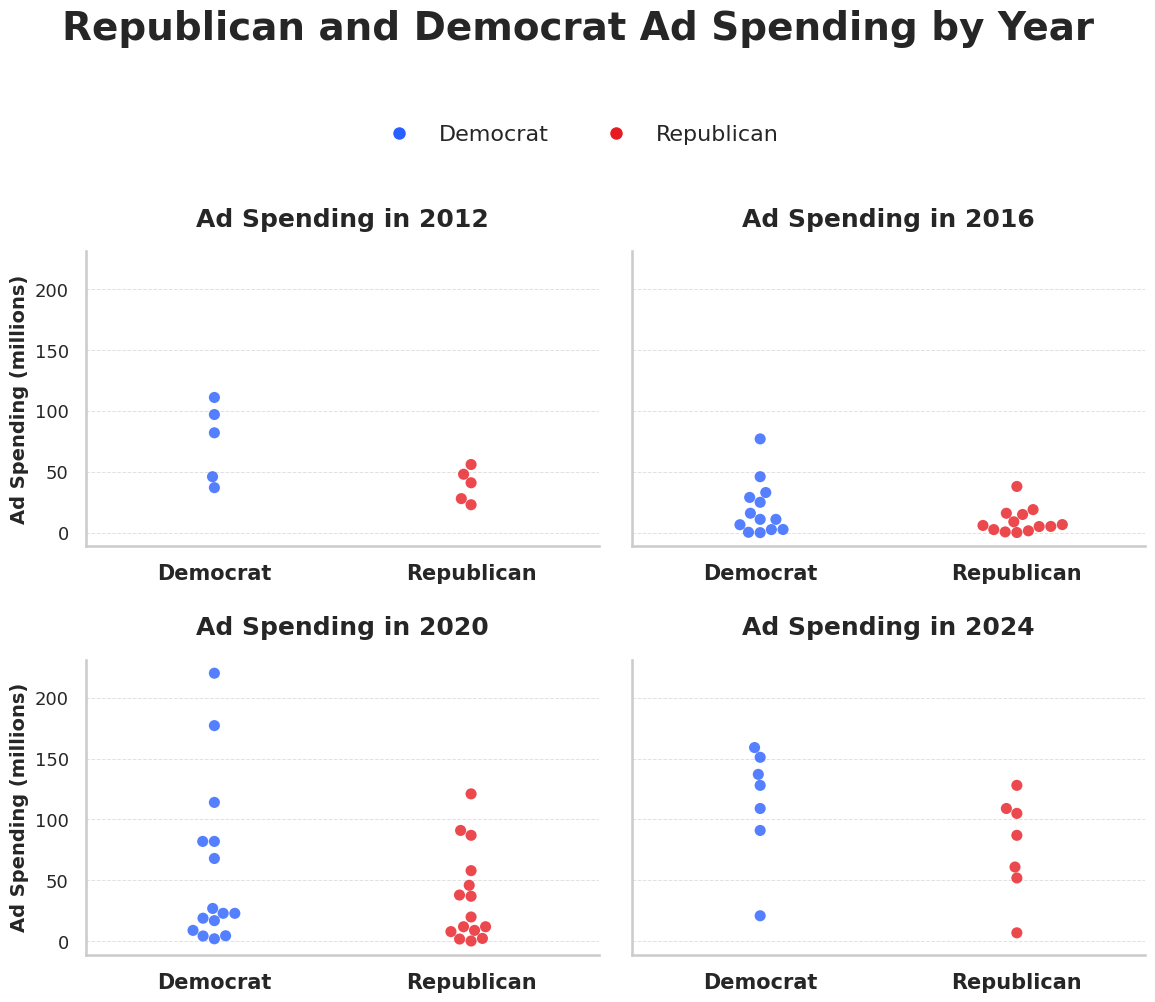

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use a clean seaborn style for prettiness
sns.set(style="whitegrid", context="talk", palette="deep", font_scale=1.20)

# Load the data
ad_data = pd.read_csv('ad_data.csv')

# El archivo tiene columnas: State, year, D-ad-spending, R-ad-spending
ad_long = ad_data.melt(
    id_vars=['State', 'year'],
    value_vars=['D-ad-spending', 'R-ad-spending'],
    var_name='Party',
    value_name='Ad Spending'
)

# Obtener años únicos y configurar subplots 2x2
unique_years = sorted(ad_long['year'].unique())
n_years = len(unique_years)
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows), sharey=True)

# Colores para cada partido
palette = {'D-ad-spending': '#295fff', 'R-ad-spending': '#e81b23'}

for idx, year in enumerate(unique_years):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col]

    # Swarmplot without the 'Swarmplot' label, prettier customizations
    sns.swarmplot(
        data=ad_long[ad_long['year'] == year],
        x='Party',
        y='Ad Spending',
        ax=ax,
        palette=palette,
        hue='Party',
        dodge=False,
        alpha=0.80,
        size=8,
        legend=False  # Don't duplicate legend per axis
    )

    # Titles without 'Swarmplot' wording, cleaner axis styling
    ax.set_title(f"Ad Spending in {year}", fontsize=18, fontweight='semibold', pad=18)
    ax.set_xlabel("")
    ax.set_xticklabels(['Democrat', 'Republican'], fontsize=15, fontweight='bold')
    if col == 0:
        ax.set_ylabel("Ad Spending (millions)", fontsize=14, fontweight='semibold')
    else:
        ax.set_ylabel("")

    # Prettify spines and ticks
    sns.despine(ax=ax)
    ax.tick_params(axis='y', labelsize=13)
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
    ax.set_axisbelow(True)

# Hide unused subplots, if any
total_plots = nrows * ncols
if n_years < total_plots:
    for idx in range(n_years, total_plots):
        row = idx // ncols
        col = idx % ncols
        fig.delaxes(axes[row, col])

# Add a single legend for all Axes, prettified
custom_lines = [
    plt.Line2D([0], [0], marker='o', color='w', label='Democrat', markersize=10, markerfacecolor='#295fff'),
    plt.Line2D([0], [0], marker='o', color='w', label='Republican', markersize=10, markerfacecolor='#e81b23')
]
fig.legend(
    handles=custom_lines,
    loc='upper center',
    bbox_to_anchor=(0.5, .92),
    ncol=2,
    frameon=False,
    fontsize=16
)

plt.suptitle(
    "Republican and Democrat Ad Spending by Year",
    fontsize=28,
    fontweight='bold',
    y=1.015  # Reduced y to tighten space
)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


/tmp/ipykernel_25538/3399405498.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96], w_pad=4)


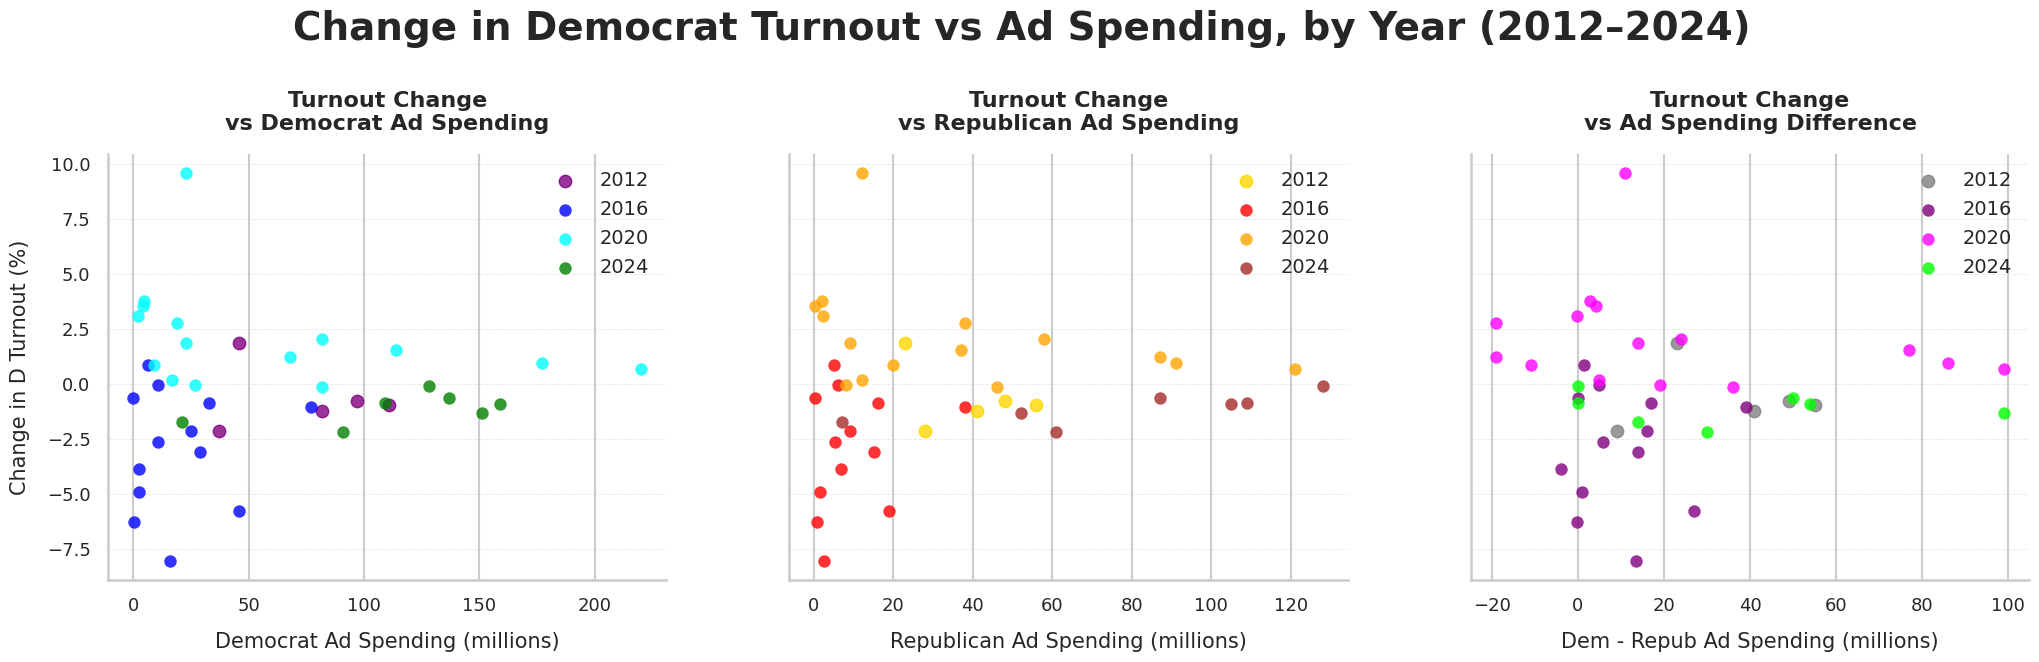

In [24]:
# We'll use the `ad_data` dataframe loaded above to avoid reloading/filter errors

# Filter for 2012 to 2024 rows (inclusive)
years_to_plot = [2012, 2016, 2020, 2024]
df_plot = ad_data[ad_data['year'].isin(years_to_plot)].copy()

# Compute Turnout_diff if missing, using columns from loaded ad_data
df_plot['Turnout_diff'] = df_plot['Turnout (D)'] - df_plot['Prior-Turnout (D)']

# Set up per-plot color by year, matching spending_analysis.ipynb
# [1] Dem ad spending plot - match @file_context_0: 2012: purple, 2016: blue, 2020: cyan, 2024: green
dem_colors = {2012: 'purple', 2016: 'blue', 2020: 'cyan', 2024: 'green'}
# [2] Repub ad spending plot - match @file_context_0: 2012: gold, 2016: red, 2020: orange, 2024: brown
rep_colors = {2012: 'gold', 2016: 'red', 2020: 'orange', 2024: 'brown'}
# [3] Diff plot - match @file_context_0: 2012: gray, 2016: purple, 2020: magenta, 2024: lime
diff_colors = {2012: 'gray', 2016: 'purple', 2020: 'magenta', 2024: 'lime'}

year_labels = {2012: '2012', 2016: '2016', 2020: '2020', 2024: '2024'}

fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True, gridspec_kw={'wspace': 0.22})

# 1. Turnout_diff vs Democrat ad spending
for year in years_to_plot:
    df_year = df_plot[df_plot['year'] == year]
    axes[0].scatter(
        df_year['D-ad-spending'],
        df_year['Turnout_diff'],
        color=dem_colors[year],
        label=year_labels[year],
        alpha=0.8,
        s=80,
        linewidths=1 if year == 2012 else 0
    )
axes[0].set_xlabel('Democrat Ad Spending (millions)', fontsize=15, labelpad=12)
axes[0].set_ylabel('Change in D Turnout (%)', fontsize=15, labelpad=12)
axes[0].set_title('Turnout Change\nvs Democrat Ad Spending', fontsize=16, fontweight='semibold', pad=17)
axes[0].legend(frameon=False, fontsize=14, loc='best')
axes[0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
axes[0].tick_params(axis='both', labelsize=13)
sns.despine(ax=axes[0])

# 2. Turnout_diff vs Republican ad spending
for year in years_to_plot:
    df_year = df_plot[df_plot['year'] == year]
    axes[1].scatter(
        df_year['R-ad-spending'],
        df_year['Turnout_diff'],
        color=rep_colors[year],
        label=year_labels[year],
        alpha=0.8,
        s=80,
        linewidths=1 if year == 2012 else 0
    )
axes[1].set_xlabel('Republican Ad Spending (millions)', fontsize=15, labelpad=12)
axes[1].set_title('Turnout Change\nvs Republican Ad Spending', fontsize=16, fontweight='semibold', pad=17)
axes[1].legend(frameon=False, fontsize=14, loc='best')
axes[1].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
axes[1].tick_params(axis='both', labelsize=13)
sns.despine(ax=axes[1])

# 3. Turnout_diff vs Dem-Repub ad spending difference
for year in years_to_plot:
    df_year = df_plot[df_plot['year'] == year]
    axes[2].scatter(
        df_year['D-ad-spending'] - df_year['R-ad-spending'],
        df_year['Turnout_diff'],
        color=diff_colors[year],
        label=year_labels[year],
        alpha=0.8,
        s=80,
        linewidths=1 if year == 2012 else 0
    )
axes[2].set_xlabel('Dem - Repub Ad Spending (millions)', fontsize=15, labelpad=12)
axes[2].set_title('Turnout Change\nvs Ad Spending Difference', fontsize=16, fontweight='semibold', pad=17)
axes[2].legend(frameon=False, fontsize=14, loc='best')
axes[2].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
axes[2].tick_params(axis='both', labelsize=13)
sns.despine(ax=axes[2])

plt.suptitle(
    "Change in Democrat Turnout vs Ad Spending, by Year (2012–2024)",
    fontsize=28,
    fontweight='bold',
    y=1.08  # move title up to add breathing room
)
plt.tight_layout(rect=[0, 0, 1, 0.96], w_pad=4)
plt.subplots_adjust(top=0.84, left=0.065, right=0.98, bottom=0.13)
plt.show()


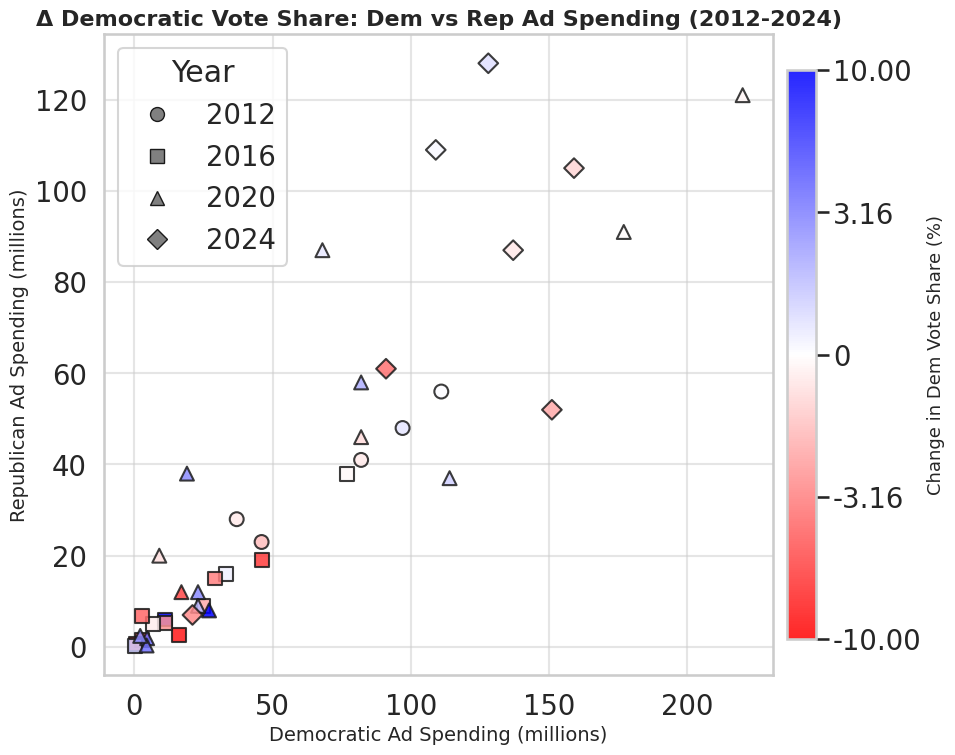

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import pandas as pd

# Load data
county_df = pd.read_csv('countypres_2000-2024.csv')
ad_df = pd.read_csv('ad_data.csv')

# --- DATA PROCESSING TO CALCULATE DEMOCRATIC SHARE CHANGE (ADAPTED FROM PREVIOUS) ---

# 1. Get state-level partisan vote counts
state_partisan_votes = county_df[county_df['party'].isin(['DEMOCRAT', 'REPUBLICAN'])].groupby(
    ['year', 'state', 'party']
)['candidatevotes'].sum().unstack(fill_value=0).reset_index()

# 2. Calculate Democratic Share and total partisan votes
state_partisan_votes['DEM_SHARE'] = state_partisan_votes['DEMOCRAT'] / (state_partisan_votes['DEMOCRAT'] + state_partisan_votes['REPUBLICAN'])
state_partisan_votes['total_partisan'] = state_partisan_votes['DEMOCRAT'] + state_partisan_votes['REPUBLICAN']

# 3. Create 'Prior-DEM_SHARE' column
state_partisan_votes = state_partisan_votes.sort_values(['state', 'year']).reset_index(drop=True)
state_partisan_votes['Prior-DEM_SHARE'] = state_partisan_votes.groupby('state')['DEM_SHARE'].shift(1)

# Standardize state names
state_partisan_votes['state'] = state_partisan_votes['state'].str.upper()
ad_df['State'] = ad_df['State'].str.upper()

# 4. Merge ad spending with the calculated vote shares
combined_df = ad_df.merge(
    state_partisan_votes[['year', 'state', 'DEM_SHARE', 'Prior-DEM_SHARE']],
    left_on=['year', 'State'],
    right_on=['year', 'state'],
    how='inner'
)

# 5. Calculate change in Democratic Share (used for color mapping)
combined_df['DemShareChange'] = combined_df['DEM_SHARE'] - combined_df['Prior-DEM_SHARE']

# Drop rows where we can't calculate the change (e.g., the first year in the data)
combined_df = combined_df.dropna(subset=['DemShareChange', 'D-ad-spending', 'R-ad-spending'])

# Rename the year column for plotting loop/labeling
combined_df['Year'] = combined_df['year'].astype(str)

# --- VISUALIZATION SETUP ---

# For log color scale: map signed values to log scale, preserving sign
def signed_log(values, min_abs=1e-3): # Adjusted min_abs slightly for potentially smaller share changes
    """Maps signed values to log scale, preserving sign."""
    # Scale from decimal (e.g., 0.05) to percent (e.g., 5.0) for better log color scale range
    percent_values = values * 100
    return np.sign(percent_values) * np.log10(np.maximum(np.abs(percent_values), min_abs))

combined_df['DemShareChange_log'] = signed_log(combined_df['DemShareChange'])

fig, ax = plt.subplots(figsize=(10,8))

# Set color normalization and colormap, centered at 0
vlim = 1  # log10(10) = 1 so vlim=1 covers -10% to 10% in original/linear space
norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-vlim, vmax=vlim)
cmap = mcolors.LinearSegmentedColormap.from_list("blue_red", ["red", "white", "blue"])

# Assign a marker per year and plot year-by-year
year_marker_color = {
    '2012': ('o', 'gold'),
    '2016': ('s', 'purple'),
    '2020': ('^', 'magenta'),
    '2024': ('D', 'lime'),
}
for year in ['2012', '2016', '2020', '2024']:
    if year not in combined_df['Year'].unique():
        continue
    marker, color = year_marker_color[year]
    year_df = combined_df[combined_df['Year'] == year]
    sc = ax.scatter(
        year_df['D-ad-spending'],
        year_df['R-ad-spending'],
        c=year_df['DemShareChange_log'],
        cmap=cmap,
        norm=norm,
        s=100,
        edgecolors='k',
        alpha=0.85,
        marker=marker,
        label=year
    )

ax.set_xlabel('Democratic Ad Spending (millions)', fontsize=14)
ax.set_ylabel('Republican Ad Spending (millions)', fontsize=14)
ax.set_title('Δ Democratic Vote Share: Dem vs Rep Ad Spending (2012-2024)', fontsize=16, fontweight='bold')

# Add colorbar with custom tick labels restoring to original scale
cbar = plt.colorbar(sc, ax=ax, fraction=0.04, pad=0.02)
log_ticks = np.array([-1, -0.5, 0, 0.5, 1])  # -10, -3.16, 0, 3.16, 10

cbar.set_ticks(log_ticks)
tick_labels = []
for t in log_ticks:
    if t == 0:
        tick_labels.append("0")
    elif t < 0:
        tick_labels.append(f"{-10**abs(t):.2f}")
    else:
        tick_labels.append(f"{10**abs(t):.2f}")
cbar.set_ticklabels(tick_labels)
cbar.set_label('Change in Dem Vote Share (%)', fontsize=13)

# Add year legend handles correctly
handles = []
for year in ['2012','2016','2020','2024']:
    if year not in combined_df['Year'].unique():
        continue
    marker, color = year_marker_color[year]
    handles.append(
        plt.Line2D([], [], marker=marker, color='gray', markerfacecolor='gray', markeredgecolor='k', markersize=10, linestyle='None', label=year)
    )

ax.legend(handles=handles, title='Year', loc='upper left')
ax.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

## Key takeaways: 

There is no clear correlation between Republican ad spending, Democrat ad spending, or the difference thereof and the change in that state's voting distribution. However, there appears to be a trend in which states with little ad spending by either side tend to have higher variance in outcome than those with significant ad spending by both. This is likely confounded as states that don't swing left or right are the battleground states and therefore have the most resources dedicated to them, but we can still substitute Ad spending for political attention and model how campaigning in a state affects the turnout distribution